Тема проекта: Изучение статистических показателей показателей ремонтируемых двигателей
Задачи:
    1. Вычислить математическое ожидание, дисперсию, среднее квадратичное отклонение стоимости ремонта двигателя;
    2. Проверить гипотезу, что медиана является средним значением выборки;
    3. Расчитать коэффициенты корреляции для стоимости ремонта, количества ремонтируемых деталей, количества ремонтируемых узлов, наработки и модели.

In [1]:
import pandas as pd
import numpy as np
import datetime
import math
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('df_item.csv')
df['count_blok'] = df['count_blok'].astype('int')
df['count_detail'] = df['count_detail'].astype('int')
df['work_time'] = df['work_time'].astype('int')
df['amount'] = df['amount'].astype('float')
df['days_repair'] = df['days_repair'].astype('int')

,series,count_blok,count_detail,work_time,amount,days_repair
51,D,20,8386,100.0,5742.0,260.0
63,D,265,1878,102.0,3744971.0,151.0
139,N,630,7526,103.0,4555.0,77.0
45,D,187,2059,104.0,2382642.0,45.0
302,M,302,3074,105.0,2573920.0,104.8


Для проведения статистического анализа были взяты данные по ремонту двигателей за предыдущие года.
По каждому двигателю фиксировались следующие показатели:
    - series - серия двигателя;
    - count_blok - солличество отремонтированных узлов;
    - count_detail - колличество отремонтированных деталей;
    - work_time - сколько часов проработал двигатель;
    - amount - стоимость ремонта;
    - days_repair - сколько дней двигатель находился в ремонте.

In [3]:
df.describe()

,count_blok,count_detail,work_time,amount,days_repair
count,1306.000000,1306.000000,1306.000000,1.306000e+03,1306.000000
mean,251.231240,2456.013783,1176.231240,2.104191e+06,222.464472
std,155.367916,1546.104023,884.351463,1.575083e+06,104.319784
min,3.000000,11.000000,100.000000,9.700000e+01,3.000000
25%,139.000000,1482.750000,687.500000,1.250757e+06,176.000000
50%,239.500000,2390.500000,1066.000000,1.980886e+06,221.000000
75%,335.000000,3164.000000,1437.000000,2.654119e+06,256.000000
max,878.000000,9269.000000,9971.000000,1.344385e+07,969.000000


Построим гистограммы распределения плотности показателей наших данных

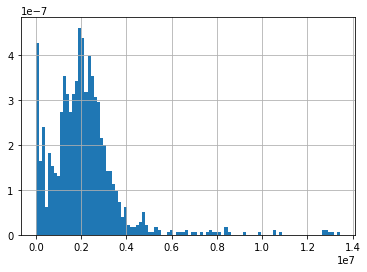

In [14]:
df['amount'].hist(density=True, bins = 100)

Из графика плотности распределения стоимости видно, что ряд значений встречаются крайне редко.

Чтобы получить удовлетворительный результат статистического анализа, предлагается отбросить данные которые встречаются крайне редко.

Для этого проанализируем более подробно показатель стоимости.

График плотности распределения показателя amount имеет вид нормального распределения.

Для вычисления разброса значений нормально распределённой случайной величины можно использовать правила 3 сигм т.к. в этом случает в анализируемую выборку попадут 99,7% массы значений нормального распределения.

In [5]:
#Наиболее часто встречающееся значение
df['amount'].mode()

0     97.0
1    138.0
dtype: float64

In [6]:
#Медиана
df['amount'].median()

1980886.2957588634

Проверим гипотезу, что медиана является средним значением нашей выборки с доверительной вероятностью 0.999

In [7]:
#Считаем средние значения стоимости и среднее квадратичное отклонение
mean_amount = df['amount'].mean()
std_amount = df['amount'].std(ddof=1)
print(round(mean_amount, 2), round(std_amount, 2 ))

2104190.85 1575083.19


In [8]:
#Считаем значение статистики
alpha = 0.001
n = df.shape[0]
t = stats.t.ppf(1 - alpha / 2, df=df.shape[0] - 1)
t

3.2979978328116863

In [9]:
#Доверительный интервал
(mean_amount - t * std_amount / np.sqrt(n), mean_amount + t * std_amount / np.sqrt(n))

(1960449.3158673372, 2247932.383704166)

Наша гипотеза подтвердилась т.к. значение медианы попало в доверительный интервал следовательно мы можем взять его за основу для расчета квантилей и убрать из выборки наблюдения которые выпадают из диапазона нормальног распределения выборки.

In [10]:
#Смещенная дисперсия
def disp_move(proc_array, sr_znach):
    sum_i = 0
    for i in range(0, np.size(proc_array)):
        sum_i = sum_i + (proc_array[i] - sr_znach)**2 
    return sum_i/np.size(proc_array)

In [11]:
#Среднее квадр. откл.
mean_amount = df['amount'].median()
std_amount = np.sqrt(disp_move(df['amount'], mean_amount)) 
print(std_amount)

1579300.9445277993


In [12]:
three_sigmas_condition = df[(df['amount'] > mean_amount - 3 * std_amount) & (df['amount'] < mean_amount + 3 * std_amount)]

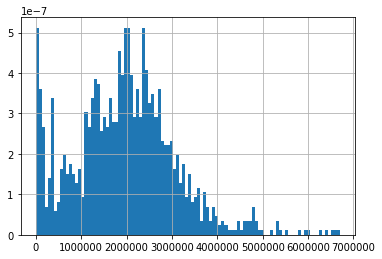

In [16]:
three_sigmas_condition['amount'] .hist(density=True, bins = 100)

Рассчитаем коэффичиенты корреляции для нашей выборки

In [18]:
three_sigmas_condition.corr()

,count_blok,count_detail,work_time,amount,days_repair
count_blok,1.000000,0.558075,0.019871,0.314423,0.025801
count_detail,0.558075,1.000000,0.012832,0.367942,0.018050
work_time,0.019871,0.012832,1.000000,0.072056,0.016024
amount,0.314423,0.367942,0.072056,1.000000,0.079301
days_repair,0.025801,0.018050,0.016024,0.079301,1.000000


На основе посчитанных значений кореляции можн сделать вывод, что стоимость ремонта имеет среднюю зависимость от колличества ремонтируемых деталей и узлов.